In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\49583723.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dt = pd.read_csv('train.csv')

## 데이터 확인 및 전처리
* flag 값 drop
* emply day 가 양수인 경우 0으로 처리
* emply day 와 birth day 개월수와 년수로 변경
* occcpy_type N 값 처리
* 중복값 처리
* 최종 데이터:dt_dd

In [4]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [5]:
# occyp_type 빈 공간 N으로 일단 채우기
dt['occyp_type'].fillna("N", inplace=True)
print('null 개수: ', dt.isnull().sum().sum())

null 개수:  0


C:\anaconda3\envs\bhoon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\bhoon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda3\envs\bhoon\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='begin_month', ylabel='Density'>

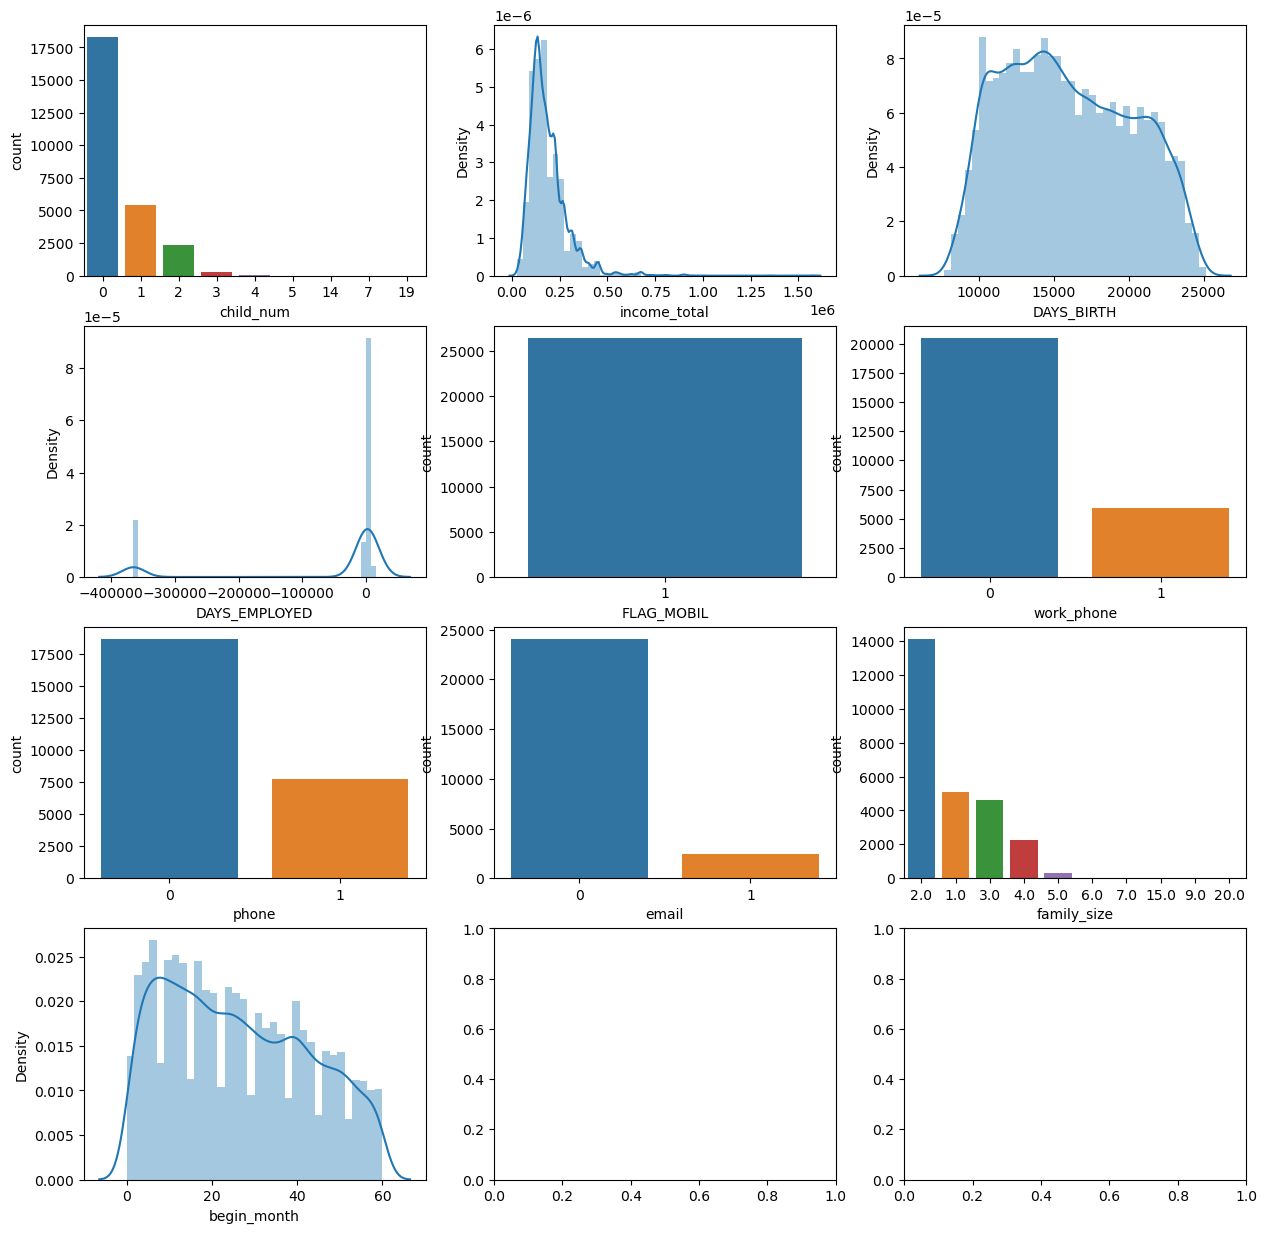

In [6]:
fig, axes = plt.subplots(4,3, figsize = (15,15))

sns.countplot(ax = axes[0,0], x = dt['child_num'], order = dt['child_num'].value_counts().index)

sns.distplot(dt['income_total'], ax = axes[0,1])

sns.distplot(-dt['DAYS_BIRTH'], ax = axes[0,2])

sns.distplot(-dt['DAYS_EMPLOYED'], ax = axes[1,0])  # 왜 음수로 나오지? => 양수 값이 있어서.

sns.countplot(ax = axes[1,1], x = dt['FLAG_MOBIL'], order = dt['FLAG_MOBIL'].value_counts().index)

sns.countplot(ax = axes[1,2], x = dt['work_phone'], order = dt['work_phone'].value_counts().index)

sns.countplot(ax = axes[2,0], x = dt['phone'], order = dt['phone'].value_counts().index)

sns.countplot(ax = axes[2,1], x = dt['email'], order = dt['email'].value_counts().index)

sns.countplot(ax = axes[2,2], x = dt['family_size'], order = dt['family_size'].value_counts().index)

sns.distplot(-dt['begin_month'], ax = axes[3,0])


In [7]:
dt.describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [8]:
# flag 모든 값이 동일
dt.drop(['index', 'FLAG_MOBIL'], axis=1, inplace=True)

In [9]:
# DAYS_EMPLOYED 가 양수인 데이터들이 있다. = 같은날.
print('EMPLOYED 양수 데이터 개수:')
print(dt['DAYS_EMPLOYED'][dt['DAYS_EMPLOYED'] > 0].value_counts(), '\n')

# 값 0으로 바꾸기
dt['DAYS_EMPLOYED'] = dt['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

EMPLOYED 양수 데이터 개수:
365243    4438
Name: DAYS_EMPLOYED, dtype: int64 



In [10]:
# 만 나이
ch_birth = dt.DAYS_BIRTH

#근무 개월
ch_emd = dt.DAYS_EMPLOYED


dt.DAYS_BIRTH = round(ch_birth*(-1)/365,1)
dt.DAYS_EMPLOYED = round(ch_emd*(-1)/30,1)

In [11]:
dt

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.1,157.0,0,0,0,N,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.2,51.3,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.3,147.8,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.3,69.7,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.2,70.2,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.1,66.1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,41.9,82.5,0,0,0,N,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,27.6,67.2,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,27.8,3.6,0,0,0,Laborers,1.0,-59.0,2.0


In [12]:
# 중복된 값들이 많아서 날리기
dt_dd = dt.drop_duplicates()

dt_dd

<AxesSubplot:xlabel='family_size', ylabel='credit'>

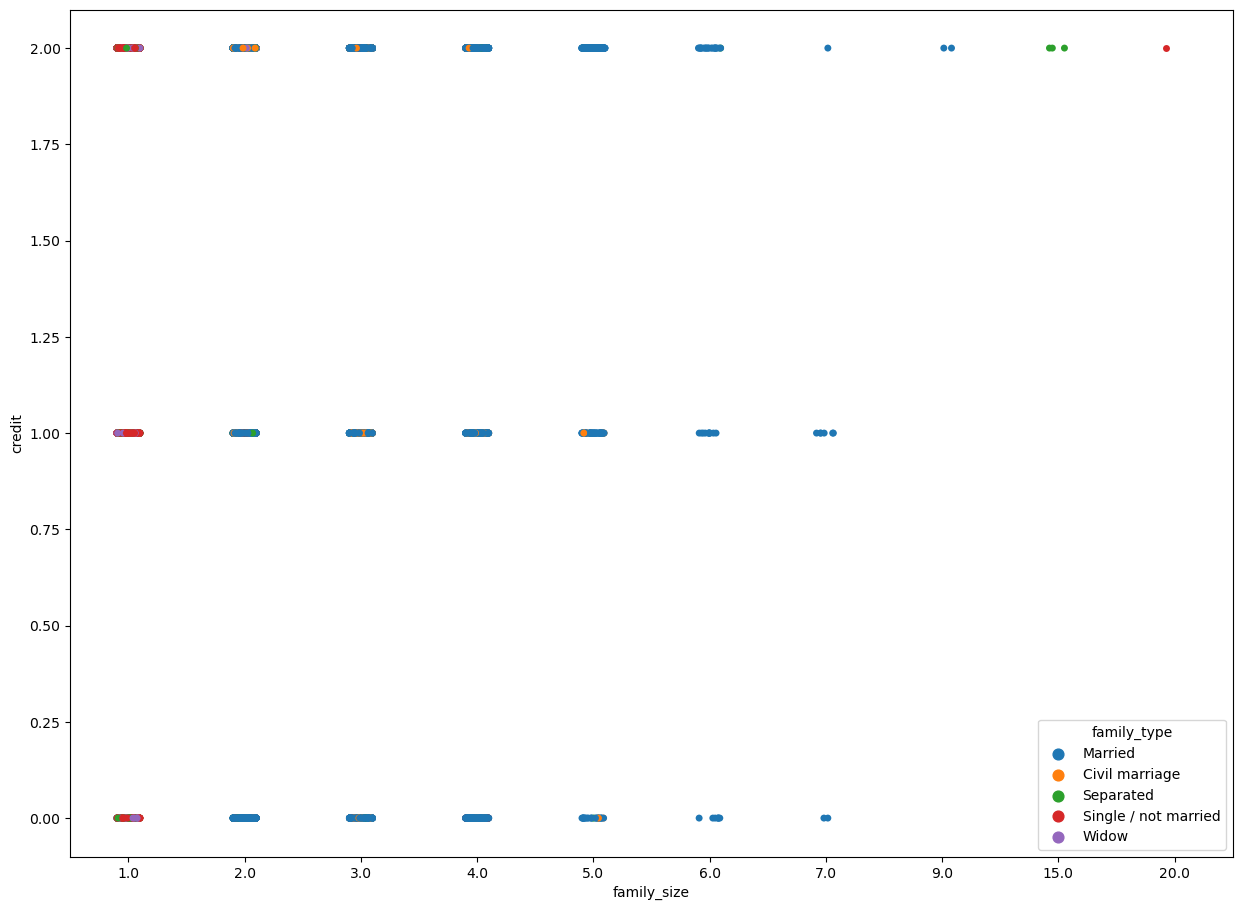

In [13]:
plt.figure(figsize=(15,11))
sns.stripplot(data=dt_dd, x ='family_size', y = 'credit', jitter=True, hue='family_type')

## family_size와 family_type을 이용하여 차원 축소를 할 수 있을까?

In [14]:
# family_size = child_num + (family_type) 라고 추론
family = dt[['child_num', 'family_type', 'family_size']]

print(len(family[family['family_type'] == 'Married'][family['child_num'] + 2 != family['family_size']]))
print(len(family[family['family_type'] == 'Civil marriage'][family['child_num'] + 2 != family['family_size']]))
print(len(family[family['family_type'] == 'Single / not married'][family['child_num'] + 1 != family['family_size']]))
print(len(family[family['family_type'] == 'Separated'][family['child_num'] + 1 != family['family_size']]))
print(len(family[family['family_type'] == 'Widow'][family['child_num'] + 1 != family['family_size']]))

3
1
18
0
0


C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\1881642102.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(family[family['family_type'] == 'Married'][family['child_num'] + 2 != family['family_size']]))
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\1881642102.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(family[family['family_type'] == 'Civil marriage'][family['child_num'] + 2 != family['family_size']]))
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\1881642102.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(family[family['family_type'] == 'Single / not married'][family['child_num'] + 1 != family['family_size']]))
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\1881642102.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(len(family[family['family_type'] == 'Separated'][family['ch

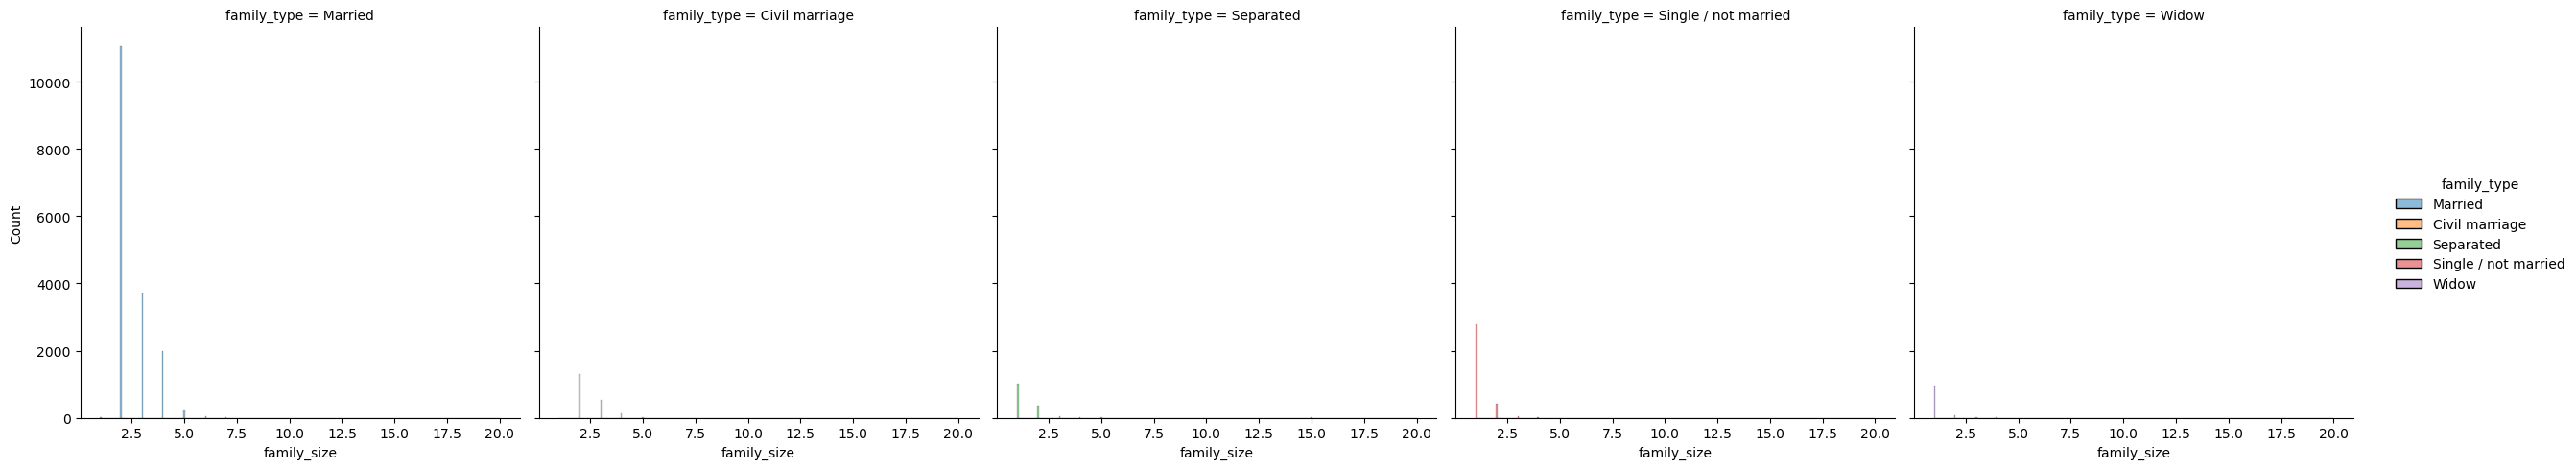

In [15]:
# Widow와 Separated의 컬럼 축소가 문제 없는지에 대한 판단을 위해 시각화
sns.displot(data=dt_dd, x="family_size", hue="family_type", col="family_type")
#famil.png

In [16]:
#그래서 widow와 seperated 이면서 family_size 수

a = len(dt.loc[(dt['family_type'] == 'Widow') & (dt['family_size'] ==1)])
b = len(dt.loc[(dt['family_type'] == 'Widow') & (dt['family_size'] > 1)])

print('전체 Widow 중 family_size가 1보다 큰 비율: ', round(b/a, 3), ' -> 7%는 아이가 있다고 판단할 수 있음')

c = len(dt.loc[(dt['family_type'] == 'Separated') & (dt['family_size'] == 1)])
d = len(dt.loc[(dt['family_type'] == 'Separated') & (dt['family_size'] > 1)])

print('전체 Separated 중 family_size가 1보다 큰 비율: ', round(d/c, 3) , ' -> 40%는 아이가 있다고 판단 할 수 있음')

전체 Widow 중 family_size가 1보다 큰 비율:  0.071  -> 7%는 아이가 있다고 판단할 수 있음
전체 Separated 중 family_size가 1보다 큰 비율:  0.402  -> 40%는 아이가 있다고 판단 할 수 있음


### 결론
따라서 family 전체 수와 비교했을 때, child_num과 family_size의 상관관계에서
단순히 1의 값을 빼서 family_type을 빼게 되면 Separated와  Widow의  차이를 분간할 수 없고
target값인 credit 값의 경향성 비교가 필요해보임

### 경향성 비교

In [17]:
# family_size가 큰 경우
print(dt.loc[(dt['family_type'] == 'Separated') & (dt['family_size'] > 1)].value_counts(dt['credit']),'\n')
print(dt.loc[(dt['family_type'] == 'Separated') & (dt['family_size'] > 1)].value_counts(dt['credit'],normalize = True), '\n')

# family_size 모든 경우
print('family_size 모든 경우: ')
print(dt.loc[(dt['family_type'] == 'Separated')].value_counts(dt['credit']),'\n')
print(dt.loc[(dt['family_type'] == 'Separated')].value_counts(dt['credit'],normalize = True))
print('이혼을 한 경우, 신용도가 아이가 있고 없고와 관련성이 ??. = 약',round(0.136-0.125,3),'의 차이: 아이가 있는 경우 신용도가 안좋은 경향')

credit
2.0    274
1.0    107
0.0     60
dtype: int64 

credit
2.0    0.621315
1.0    0.242630
0.0    0.136054
dtype: float64 

family_size 모든 경우: 
credit
2.0    997
1.0    349
0.0    193
dtype: int64 

credit
2.0    0.647823
1.0    0.226771
0.0    0.125406
dtype: float64
이혼을 한 경우, 신용도가 아이가 있고 없고와 관련성이 ??. = 약 0.011 의 차이: 아이가 있는 경우 신용도가 안좋은 경향


In [18]:
# family_size가 큰 경우
print(dt.loc[(dt['family_type'] == 'Widow') & (dt['family_size'] > 1)].value_counts(dt['credit']),'\n')
print(dt.loc[(dt['family_type'] == 'Widow') & (dt['family_size'] > 1)].value_counts(dt['credit'],normalize = True), '\n')

# family_size 모든 경우
print('family_size 모든 경우: ')
print(dt.loc[(dt['family_type'] == 'Widow')].value_counts(dt['credit']),'\n')
print(dt.loc[(dt['family_type'] == 'Widow')].value_counts(dt['credit'],normalize = True))
print('과부인 경우, 신용도가 아이가 있고 없고와 관련성이 ??. = 약',round(0.096-0.114,3),'의 차이: 아이가 있는 경우 신용도가 좋은 경향')

credit
2.0    48
1.0    18
0.0     7
dtype: int64 

credit
2.0    0.657534
1.0    0.246575
0.0    0.095890
dtype: float64 

family_size 모든 경우: 
credit
2.0    678
1.0    299
0.0    126
dtype: int64 

credit
2.0    0.614687
1.0    0.271079
0.0    0.114234
dtype: float64
과부인 경우, 신용도가 아이가 있고 없고와 관련성이 ??. = 약 -0.018 의 차이: 아이가 있는 경우 신용도가 좋은 경향


### 경향성 비교 결론
*  위의 자료를 비교해 보았을 때, widow는 family_size가 큰 경우에 family_size가 1인 경우에 비해 신용도가 좋지 않은 경향을 보임.
*  같은 이유로, Separated는 family_size가 큰 경우에 family_size가 1인 경우에 비해 신용도가 좋은 경향을 보임.
*  따라서 Separated와 Widow는 family_size를 두고 신용도를 비교해보았을 때, 경향성이 다르므로 family_type을 삭제할 수 없음.

### 추가적인 정보 확인

In [19]:
# 동거, 입양의 경우?: 18가지
family[family['family_type'] == 'Single / not married'][family['child_num'] + 1 != family['family_size']]
# 오히려 동거와 입양처럼 아래에 대한 컬럼을 추가해주는 것도 나쁘지 않아보임.

C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\49617492.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  family[family['family_type'] == 'Single / not married'][family['child_num'] + 1 != family['family_size']]


,child_num,family_type,family_size
684,0,Single / not married,2.0
3064,0,Single / not married,2.0
3138,0,Single / not married,2.0
3890,2,Single / not married,4.0
5825,1,Single / not married,1.0
6683,0,Single / not married,2.0
10279,0,Single / not married,2.0
11308,0,Single / not married,2.0
14287,1,Single / not married,3.0
15407,0,Single / not married,2.0


* 오히려 동거와 입양처럼 보이는 경우의 수에 대한 컬럼을 추가해주는 것도 나쁘지 않아보임.

In [20]:
# 반대로 아래와 같은 결혼을 하고 아이가 있음에도 family_size가 1로 나오는 이상한 경우를 이상치로 처리하고 삭제하는 것이 좋아보임.
print(family[family['family_type'] == 'Married'][family['child_num'] + 2 != family['family_size']])
print('\n')
print(family[family['family_type'] == 'Civil marriage'][family['child_num'] + 2 != family['family_size']])

       child_num family_type  family_size
14900          2     Married          1.0
16791          1     Married          1.0
21096          1     Married          1.0


       child_num     family_type  family_size
18879          1  Civil marriage          1.0


C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2049166695.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(family[family['family_type'] == 'Married'][family['child_num'] + 2 != family['family_size']])
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2049166695.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(family[family['family_type'] == 'Civil marriage'][family['child_num'] + 2 != family['family_size']])


In [21]:
# 삭제를 위해 index, 확인
print(dt_dd[dt_dd['family_type'] == 'Married'][dt_dd['child_num'] + 2 != dt_dd['family_size']])
print('\n')
print(dt_dd[dt_dd['family_type'] == 'Civil marriage'][dt_dd['child_num'] + 2 != dt_dd['family_size']])

      gender car reality  child_num  income_total income_type  \
14900      M   Y       N          2      225000.0     Working   
16791      F   N       Y          1      126000.0     Working   
21096      M   N       N          1      157500.0     Working   

                            edu_type family_type         house_type  \
14900  Secondary / secondary special     Married  House / apartment   
16791  Secondary / secondary special     Married  House / apartment   
21096  Secondary / secondary special     Married  House / apartment   

       DAYS_BIRTH  DAYS_EMPLOYED  work_phone  phone  email  occyp_type  \
14900        40.5           73.7           0      0      0     Drivers   
16791        33.3           26.0           0      0      0  Core staff   
21096        45.0           48.6           0      0      0     Drivers   

       family_size  begin_month  credit  
14900          1.0        -30.0     2.0  
16791          1.0        -37.0     2.0  
21096          1.0        -25.0

C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2258572103.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(dt_dd[dt_dd['family_type'] == 'Married'][dt_dd['child_num'] + 2 != dt_dd['family_size']])
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2258572103.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(dt_dd[dt_dd['family_type'] == 'Civil marriage'][dt_dd['child_num'] + 2 != dt_dd['family_size']])


In [22]:
index1 = dt_dd[dt_dd['family_type'] == 'Married'][dt_dd['child_num'] + 2 != dt_dd['family_size']].index
index2 = dt_dd[dt_dd['family_type'] == 'Civil marriage'][dt_dd['child_num'] + 2 != dt_dd['family_size']].index
print(index1, index2)

Int64Index([14900, 16791, 21096], dtype='int64') Int64Index([18879], dtype='int64')


C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2746412052.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index1 = dt_dd[dt_dd['family_type'] == 'Married'][dt_dd['child_num'] + 2 != dt_dd['family_size']].index
C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2746412052.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  index2 = dt_dd[dt_dd['family_type'] == 'Civil marriage'][dt_dd['child_num'] + 2 != dt_dd['family_size']].index


In [23]:
dt_dd.drop(index1, inplace=True); dt_dd.drop(index2, inplace=True)

C:\Users\Byeonghoon\AppData\Local\Temp\ipykernel_11280\2759189844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_dd.drop(index1, inplace=True); dt_dd.drop(index2, inplace=True)


### 이상치 확인 후, 최종 데이터 정리: dt_dd

In [24]:
dt_dd

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.1,157.0,0,0,0,N,2.0,-6.0,1.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.2,51.3,0,0,1,Laborers,3.0,-5.0,1.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.3,147.8,0,1,0,Managers,2.0,-22.0,2.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.3,69.7,0,1,0,Sales staff,2.0,-37.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.2,70.2,0,0,0,Managers,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.1,66.1,0,0,0,Core staff,4.0,-2.0,1.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,41.9,82.5,0,0,0,N,2.0,-47.0,2.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,27.6,67.2,0,0,0,Core staff,2.0,-25.0,2.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,27.8,3.6,0,0,0,Laborers,1.0,-59.0,2.0


dt_htmap = dt_dd.pivot("family_size", "credit", "edu_type")
plt.title("가족 수, 교육수준, 신용도에 대한 Heatmap")
sns.heatmap(dt_htmap, annot=True, fmt="d", linewidths=1)
plt.show()

<AxesSubplot:>

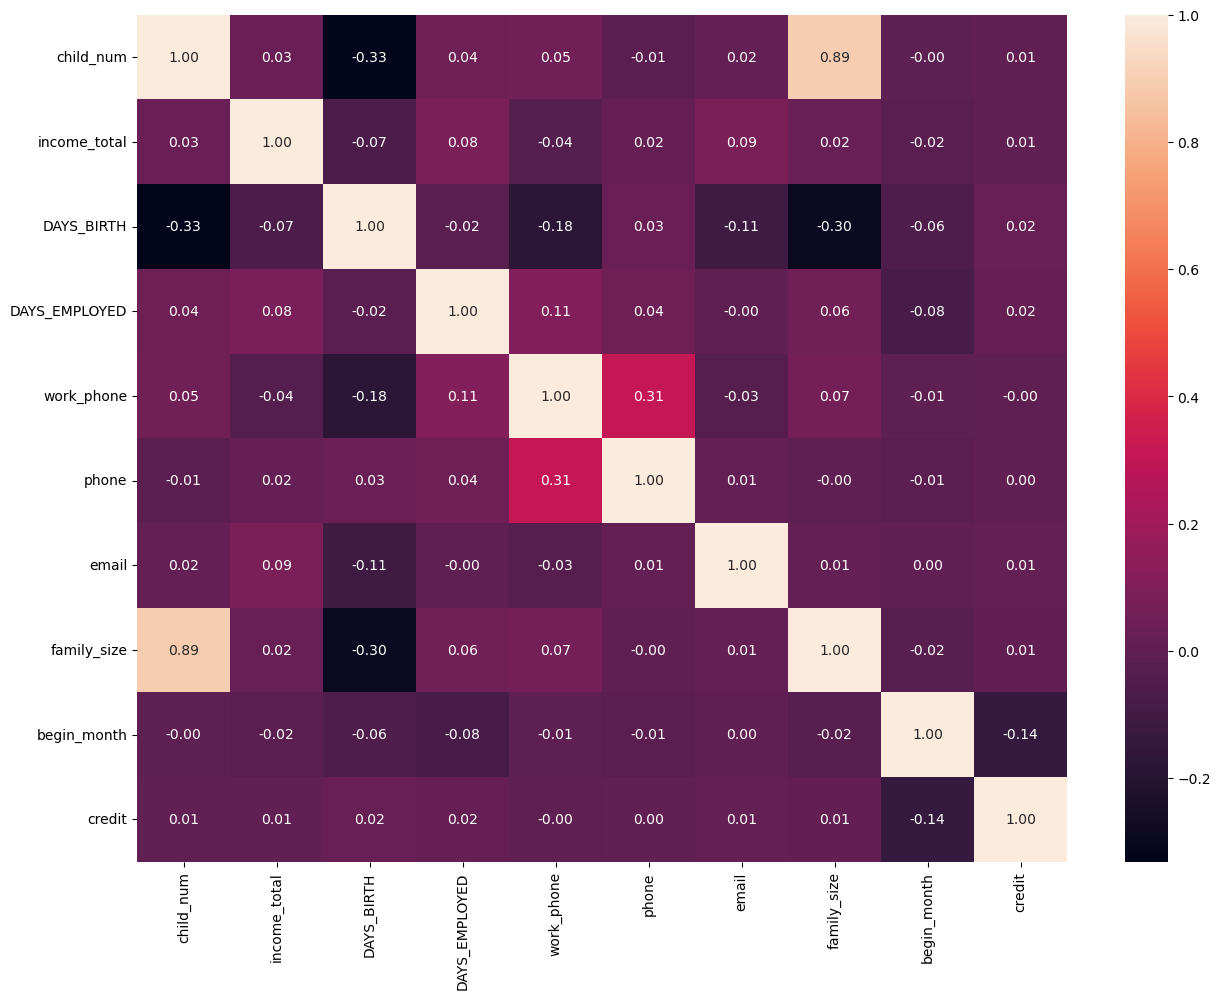

In [25]:
plt.figure(figsize = (15,11))
sns.heatmap(dt_dd.corr(), annot=True, fmt = ".2f")

## one-hot encoding

In [26]:
dt_hot = dt_dd[['income_type', 'edu_type', 'family_type', 'house_type']]
dt_hot

,income_type,edu_type,family_type,house_type
0,Commercial associate,Higher education,Married,Municipal apartment
1,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment
2,Working,Higher education,Married,House / apartment
3,Commercial associate,Secondary / secondary special,Married,House / apartment
4,State servant,Higher education,Married,House / apartment
...,...,...,...,...
26452,State servant,Secondary / secondary special,Married,House / apartment
26453,Working,Higher education,Separated,House / apartment
26454,Working,Secondary / secondary special,Civil marriage,With parents
26455,Working,Incomplete higher,Single / not married,House / apartment


In [27]:
all_incty = []

for x in dt_dd.income_type:
    all_incty.extend(x.split('|'))

In [28]:
incty = pd.unique(all_incty)

print(len(incty))
incty

5


array(['Commercial associate', 'Working', 'State servant', 'Pensioner',
       'Student'], dtype=object)

In [29]:
zero_matrix = np.zeros((len(dt_dd), len(incty)))

print(zero_matrix.shape)
zero_matrix

(24818, 5)


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [30]:
dummies_1 = pd.DataFrame(zero_matrix, columns=incty)

dummies_1

,Commercial associate,Working,State servant,Pensioner,Student
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
24813,0.0,0.0,0.0,0.0,0.0
24814,0.0,0.0,0.0,0.0,0.0
24815,0.0,0.0,0.0,0.0,0.0
24816,0.0,0.0,0.0,0.0,0.0


In [31]:
for i, inc in enumerate(dt_dd.income_type):
    indices = dummies_1.columns.get_indexer(inc.split('|'))
    dummies_1.iloc[i, indices] = 1
    
dummies_1.index = dt_dd.index
dummies_1

,Commercial associate,Working,State servant,Pensioner,Student
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
26452,0.0,0.0,1.0,0.0,0.0
26453,0.0,1.0,0.0,0.0,0.0
26454,0.0,1.0,0.0,0.0,0.0
26455,0.0,1.0,0.0,0.0,0.0


In [32]:
dt_hot_1 = dt_dd.join(dummies_1.add_prefix('incty_'))

dt_hot_1

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,email,occyp_type,family_size,begin_month,credit,incty_Commercial associate,incty_Working,incty_State servant,incty_Pensioner,incty_Student
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.1,...,0,N,2.0,-6.0,1.0,1.0,0.0,0.0,0.0,0.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.2,...,1,Laborers,3.0,-5.0,1.0,1.0,0.0,0.0,0.0,0.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.3,...,0,Managers,2.0,-22.0,2.0,0.0,1.0,0.0,0.0,0.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.3,...,0,Sales staff,2.0,-37.0,0.0,1.0,0.0,0.0,0.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.2,...,0,Managers,2.0,-26.0,2.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.1,...,0,Core staff,4.0,-2.0,1.0,0.0,0.0,1.0,0.0,0.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,41.9,...,0,N,2.0,-47.0,2.0,0.0,1.0,0.0,0.0,0.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,27.6,...,0,Core staff,2.0,-25.0,2.0,0.0,1.0,0.0,0.0,0.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,27.8,...,0,Laborers,1.0,-59.0,2.0,0.0,1.0,0.0,0.0,0.0


In [33]:
#1
all_edu = []
for x in dt_dd.edu_type:
    all_edu.extend(x.split('|'))

#2
edu = pd.unique(all_edu)
print(len(edu))
print(edu)

#3
zero_matrix = np.zeros((len(dt_dd), len(edu)))
dummies_2 = pd.DataFrame(zero_matrix, columns=edu)

#4
for i, inc in enumerate(dt_dd.edu_type):
    indices = dummies_2.columns.get_indexer(inc.split('|'))
    dummies_2.iloc[i, indices] = 1
dummies_2.index = dt_dd.index
print(dummies_2)

#5
dt_hot_2 = dt_hot_1.join(dummies_2.add_prefix('edu_'))

5
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
       Higher education  Secondary / secondary special  Incomplete higher  \
0                   1.0                            0.0                0.0   
1                   0.0                            1.0                0.0   
2                   1.0                            0.0                0.0   
3                   0.0                            1.0                0.0   
4                   1.0                            0.0                0.0   
...                 ...                            ...                ...   
26452               0.0                            1.0                0.0   
26453               1.0                            0.0                0.0   
26454               0.0                            1.0                0.0   
26455               0.0                            0.0                1.0   
26456               0.0                  

In [34]:
#1
all_fmty = []
for x in dt_dd.family_type:
    all_fmty.extend(x.split('|'))

#2
fmty = pd.unique(all_fmty)
print(len(fmty))
print(fmty)

#3
zero_matrix = np.zeros((len(dt_dd), len(fmty)))
dummies_3 = pd.DataFrame(zero_matrix, columns=fmty)

#4
for i, inc in enumerate(dt_dd.family_type):
    indices = dummies_3.columns.get_indexer(inc.split('|'))
    dummies_3.iloc[i, indices] = 1
dummies_3.index = dt_dd.index
print(dummies_3)

#5
dt_hot_3 = dt_hot_2.join(dummies_3.add_prefix('fmty_'))

5
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
       Married  Civil marriage  Separated  Single / not married  Widow
0          1.0             0.0        0.0                   0.0    0.0
1          0.0             1.0        0.0                   0.0    0.0
2          1.0             0.0        0.0                   0.0    0.0
3          1.0             0.0        0.0                   0.0    0.0
4          1.0             0.0        0.0                   0.0    0.0
...        ...             ...        ...                   ...    ...
26452      1.0             0.0        0.0                   0.0    0.0
26453      0.0             0.0        1.0                   0.0    0.0
26454      0.0             1.0        0.0                   0.0    0.0
26455      0.0             0.0        0.0                   1.0    0.0
26456      0.0             1.0        0.0                   0.0    0.0

[24818 rows x 5 columns]


In [35]:
#1
all_hsty = []
for x in dt_dd.house_type:
    all_hsty.extend(x.split('|'))

#2
hsty = pd.unique(all_hsty)
print(len(hsty))
print(hsty)

#3
zero_matrix = np.zeros((len(dt_dd), len(hsty)))
dummies_4 = pd.DataFrame(zero_matrix, columns=hsty)

#4
for i, inc in enumerate(dt_dd.house_type):
    indices = dummies_4.columns.get_indexer(inc.split('|'))
    dummies_4.iloc[i, indices] = 1
dummies_4.index = dt_dd.index
print(dummies_4)

#5
dt_hot_4 = dt_hot_3.join(dummies_4.add_prefix('hsty_'))

6
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']
       Municipal apartment  House / apartment  With parents  Co-op apartment  \
0                      1.0                0.0           0.0              0.0   
1                      0.0                1.0           0.0              0.0   
2                      0.0                1.0           0.0              0.0   
3                      0.0                1.0           0.0              0.0   
4                      0.0                1.0           0.0              0.0   
...                    ...                ...           ...              ...   
26452                  0.0                1.0           0.0              0.0   
26453                  0.0                1.0           0.0              0.0   
26454                  0.0                0.0           1.0              0.0   
26455                  0.0                1.0           0.0              0.0   
26

In [36]:
dt_hot_4

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,...,fmty_Civil marriage,fmty_Separated,fmty_Single / not married,fmty_Widow,hsty_Municipal apartment,hsty_House / apartment,hsty_With parents,hsty_Co-op apartment,hsty_Rented apartment,hsty_Office apartment
0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,38.1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,31.2,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,52.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,41.3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,41.2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,State servant,Secondary / secondary special,Married,House / apartment,33.1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26453,F,N,Y,1,180000.0,Working,Higher education,Separated,House / apartment,41.9,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26454,F,Y,N,0,292500.0,Working,Secondary / secondary special,Civil marriage,With parents,27.6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26455,M,N,Y,0,171000.0,Working,Incomplete higher,Single / not married,House / apartment,27.8,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
dt_hot_4.drop(['income_type', 'edu_type', 'family_type', 'house_type'], axis = 1, inplace=True)

In [38]:
dt_hot_4

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,fmty_Civil marriage,fmty_Separated,fmty_Single / not married,fmty_Widow,hsty_Municipal apartment,hsty_House / apartment,hsty_With parents,hsty_Co-op apartment,hsty_Rented apartment,hsty_Office apartment
0,F,N,N,0,202500.0,38.1,157.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,F,N,Y,1,247500.0,31.2,51.3,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,M,Y,Y,0,450000.0,52.3,147.8,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,F,N,Y,0,202500.0,41.3,69.7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,F,Y,Y,0,157500.0,41.2,70.2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,F,N,N,2,225000.0,33.1,66.1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26453,F,N,Y,1,180000.0,41.9,82.5,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26454,F,Y,N,0,292500.0,27.6,67.2,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26455,M,N,Y,0,171000.0,27.8,3.6,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
print('null 개수: ', dt_hot_4.isnull().sum().sum())

null 개수:  0


In [40]:
# 2개 범주의 경우 labelcoding
map_gender = {'M':1, 'F':0}
map_car = {'Y':1, 'N':0}
map_real = {'Y':1, 'N':0}

dt_hot_4[['gender']] = dt_hot_4[['gender']].applymap(map_gender.get)
dt_hot_4[['car']] = dt_hot_4[['car']].applymap(map_car.get)
dt_hot_4[['reality']] = dt_hot_4[['reality']].applymap(map_real.get)

### onehot-file-name: dt_hot_4

In [41]:
dt_hot_4

,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,...,fmty_Civil marriage,fmty_Separated,fmty_Single / not married,fmty_Widow,hsty_Municipal apartment,hsty_House / apartment,hsty_With parents,hsty_Co-op apartment,hsty_Rented apartment,hsty_Office apartment
0,0,0,0,0,202500.0,38.1,157.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1,1,247500.0,31.2,51.3,0,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,1,1,0,450000.0,52.3,147.8,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,0,1,0,202500.0,41.3,69.7,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,1,1,0,157500.0,41.2,70.2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,2,225000.0,33.1,66.1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26453,0,0,1,1,180000.0,41.9,82.5,0,0,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26454,0,1,0,0,292500.0,27.6,67.2,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26455,1,0,1,0,171000.0,27.8,3.6,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [42]:
dt_hot_4.columns

Index(['gender', 'car', 'reality', 'child_num', 'income_total', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'work_phone', 'phone', 'email', 'occyp_type',
       'family_size', 'begin_month', 'credit', 'incty_Commercial associate',
       'incty_Working', 'incty_State servant', 'incty_Pensioner',
       'incty_Student', 'edu_Higher education',
       'edu_Secondary / secondary special', 'edu_Incomplete higher',
       'edu_Lower secondary', 'edu_Academic degree', 'fmty_Married',
       'fmty_Civil marriage', 'fmty_Separated', 'fmty_Single / not married',
       'fmty_Widow', 'hsty_Municipal apartment', 'hsty_House / apartment',
       'hsty_With parents', 'hsty_Co-op apartment', 'hsty_Rented apartment',
       'hsty_Office apartment'],
      dtype='object')

In [43]:
ch_hot4 = dt_hot_4
ch_hot4.drop('occyp_type', axis=1, inplace=True)

### onehot -  heatmap

<AxesSubplot:>

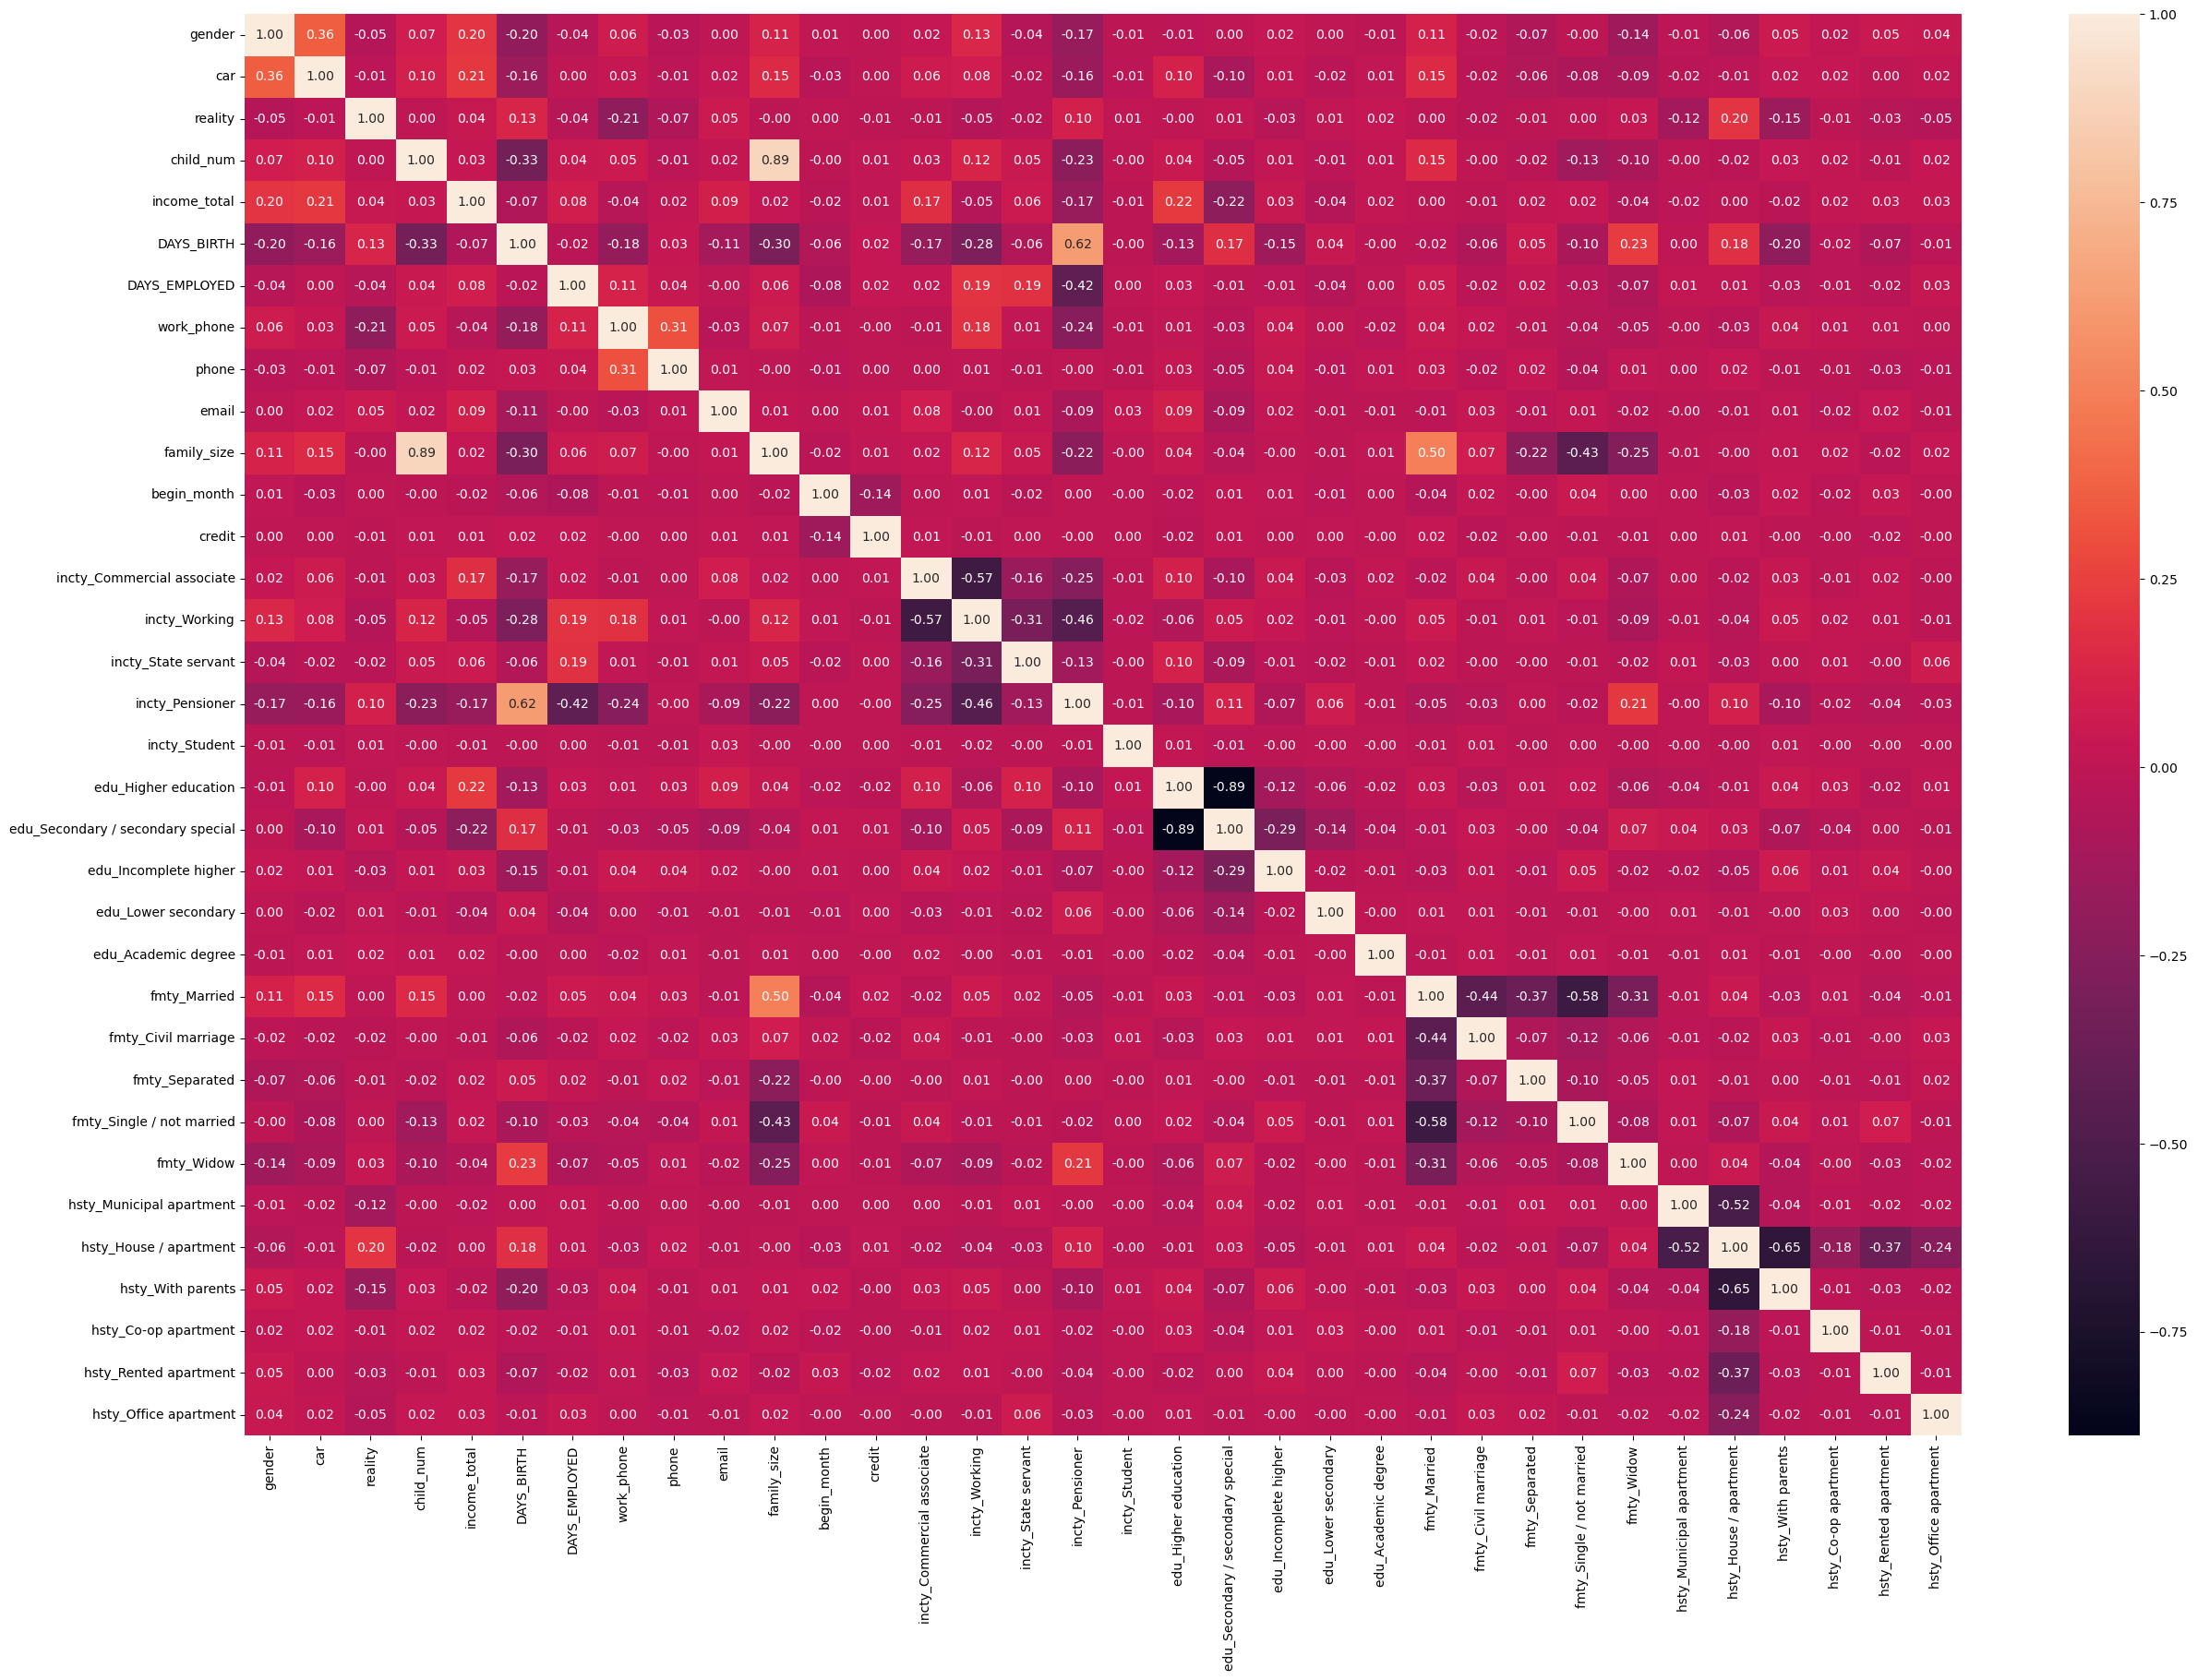

In [44]:
plt.figure(figsize = (30, 20))
sns.heatmap(dt_hot_4.astype(float).corr(), annot=True, fmt = ".2f")

#### heatmap 고찰
* 위의 heatmap으로 family_size와 family_type을 살려야하고, child_num은 없애도 된다는 사실 파악